In [2]:
import os
import torch

is_cuda = torch.cuda.is_available()
device = torch.device("cuda" if is_cuda else "cpu")
print(device)

# Load the MNIST dataset
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# 判断训练集是否存在如果存在就不再重复下载
# Load the MNIST dataset
data_path = './data'

# Always define trainset and testset
trainset = datasets.MNIST(data_path, download=not os.path.exists(data_path), train=True, transform=transform)
testset = datasets.MNIST(data_path, download=not os.path.exists(data_path), train=False, transform=transform)

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print('MNIST dataset loaded')
print(f'Train dataset shape: {trainset.data.shape}')
print(f"Test dataset shape: {testset.data.shape}")


cuda
MNIST dataset loaded
Train dataset shape: torch.Size([60000, 28, 28])
Test dataset shape: torch.Size([10000, 28, 28])


torch.Size([1, 28, 28])
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.00

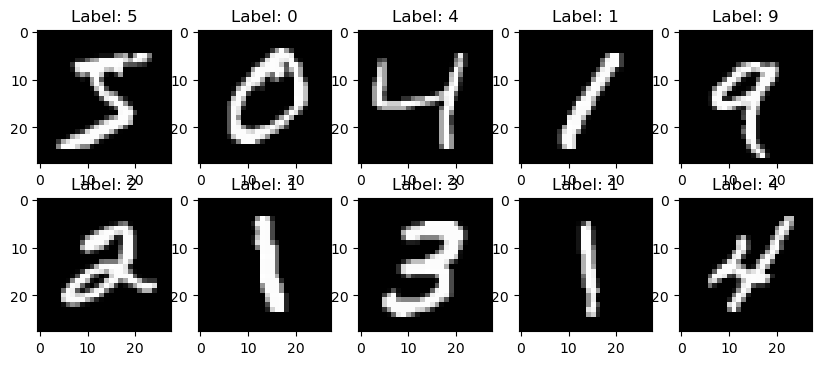

In [3]:
# 展示数据集
import matplotlib.pyplot as plt

# Visualize the first 10 images from the training set
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    img, label = trainset[i]
    print(img.shape)
    print(img)
    print(label)
    # img.numpy().squeeze() 将tensor转为numpy， 并将(1,28,28) -> (28,28)
    axs[i//5, i%5].imshow(img.numpy().squeeze(), cmap='gray')
    axs[i//5, i%5].set_title(f'Label: {label}')
plt.show()

# torch.nn.functional 是一个函数库，包含各种激活函数、损失函数、池化函数等
什么时候应该使用nn.Module和nn.functional? 
当需要定义复杂的模型结构时，比如模型有需要学习的参数时，应该使用nn.Module，因为nn.Module提供了更多的功能和灵活性。例如，nn.Module可以定义模型中的层，并自动处理权重的初始化、参数的更新等。

当需要使用一些特定的函数时，应该使用nn.functional。例如，nn.functional提供了很多常见的损失函数、激活函数、池化函数等。

In [11]:
from torch.nn.attention import bias
import torch.nn.functional as F

loss_function = F.cross_entropy
batch_size = 64
xb = trainset.data[0: batch_size].float().view(batch_size, -1)
yb = trainset.targets[0: batch_size]
# 随机初始化权重矩阵和偏置向量
weights = torch.randn([784, 10], dtype=torch.float, requires_grad=True)
biases = torch.randn([10], requires_grad=True)
def model(xb):
    return xb.mm(weights) + biases

print(loss_function(model(xb), yb))

tensor(3428.4619, grad_fn=<NllLossBackward0>)


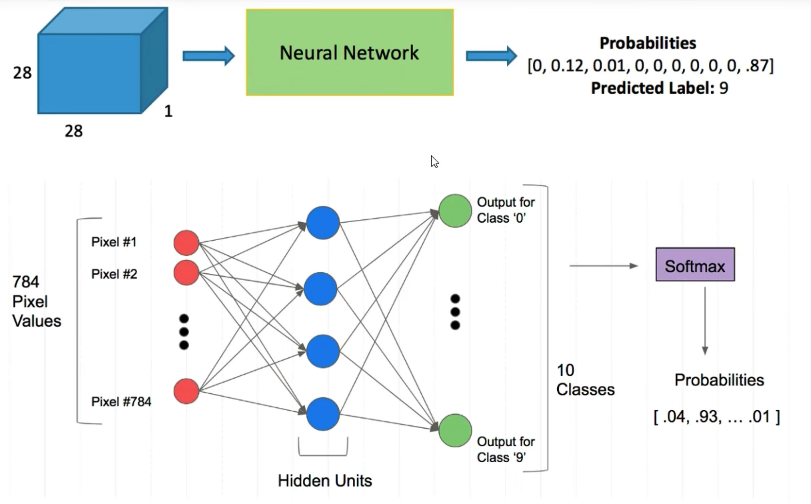

上层是我们的输入层，也就是输入层有784个神经元，也就是输入层有784个神经元。
输入层有784个神经元是因为MNIST数据集的图像是28x28像素的灰度图像，所以有784个像素点。
输出层有10个神经元是因为MNIST数据集有10个数字，也就是输出层有10个神经元。
中间层有100个神经元是因为我们选择100个神经元作为中间层。
中间层有100个神经元是因为在深度学习中，通常使用100个神经元作为中间层。
100个神经元是一个比较常见的选择，因为100个神经元可以处理复杂的特征提取，
并且可以提高模型的性能。

## 创建一个mmode来简化代码
- 继承nn.Mdodule 
- 无需手写反向传播函数，nn.Module能够根据autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters和parameters方法访问，
  前者返回的是一个迭代器，后者返回的是一个列表

In [ ]:
from torch import nn


class ModelNet(nn.Module):
    def __init__(self):
        super(ModelNet, self).__init__()
        self.hidden1 = nn.Linear(784, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.Dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        #dropout 一般添加在全连接层上
        x = self.Dropout(x)
        x = self.relu(self.hidden2(x))
        x = self.Dropout(x)
        x = self.output(x)
        return x

model = ModelNet()
print(model)
for name, param in model.named_parameters():
    print(name, param, param.shape)


ModelNet(
  (hidden1): Linear(in_features=784, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (Dropout): Dropout(p=0.5, inplace=False)
)
hidden1.weight Parameter containing:
tensor([[-0.0030, -0.0174,  0.0282,  ..., -0.0330,  0.0273, -0.0198],
        [ 0.0235, -0.0100, -0.0212,  ..., -0.0052, -0.0112,  0.0258],
        [ 0.0327, -0.0156,  0.0337,  ...,  0.0186, -0.0330, -0.0171],
        ...,
        [-0.0288, -0.0137,  0.0312,  ..., -0.0004, -0.0246,  0.0174],
        [-0.0286,  0.0184, -0.0309,  ..., -0.0245,  0.0267, -0.0102],
        [-0.0074,  0.0053, -0.0013,  ...,  0.0239,  0.0232,  0.0300]],
       requires_grad=True) torch.Size([256, 784])
hidden1.bias Parameter containing:
tensor([-0.0050,  0.0209,  0.0116,  0.0310,  0.0135, -0.0156,  0.0199,  0.0285,
        -0.0019,  0.0299, -0.0185, -0.0348, -0.0336, -0.0117, -0.0117,  0.0021,
         0.0100,

In [24]:
from torch.optim import SGD
# 训练模型
# 定义优化器
optimizer = SGD(model.parameters(), lr=0.01)
print(optimizer)
# 定义损失函数
loss_function = F.cross_entropy
# 定义训练轮数
epochs = 10
batch_size = 64
epoch = 0
print(f'Train Start Epoch: {epoch}')
model= model.to(device)
for _, (data, target) in enumerate(trainloader):
    print(data.shape)
    print(target.shape)
    data, target = data.to(device).view(batch_size, -1), target.to(device).view(batch_size)
    model.train()
    optimizer.zero_grad()
    output = model(data)
    #print(output)
    loss = F.cross_entropy(output, target)
    print(loss.item())
    loss.backward()
    optimizer.step()
    break
    
print(f'Train End Epoch: {epoch}')

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Train Start Epoch: 0
torch.Size([64, 1, 28, 28])
torch.Size([64])
2.3134233951568604
Train End Epoch: 0


In [31]:
from idna import core
from torch.optim import SGD, Adam
# 训练模型
# 定义优化器
optimizer = SGD(model.parameters(), lr=0.01)
#optimizer = Adam(model.parameters(), lr=0.01)
# 定义损失函数
loss_function = F.cross_entropy
# 定义训练轮数
epochs = 1
trainloader = torch.utils.data.DataLoader(trainset, batch_size=500, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=500, shuffle=False)

def train(model, device, train_loader, optimizer, epoch):
    # 打印训练开始的信息
    print(f'Train Start Epoch: {epoch}')
    loss=0
    # 遍历训练数据集
    for batch_idx, (data, target) in enumerate(train_loader):
        batch_size = len(data)
        # 将数据转移到指定设备上，并调整数据形状
        data, target = data.to(device).view(batch_size, -1), target.to(device).view(batch_size)
        # 将模型设置为训练模式
        model.train()
        # 将优化器的梯度清零
        optimizer.zero_grad()
        # 前向传播
        output = model(data)
        # 计算损失, output为模型输出，target为真实标签
        loss = F.cross_entropy(output, target)
        # 打印当前批次的损失
        #print(f'Epoch: {epoch}, Batch Idx:{batch_idx}, Loss: {loss.item()}')
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()
    
    # 打印训练结束的信息
    print(f'Train End Epoch: {epoch}, Loss: {loss.item()}')

def test(model, device, test_loader):
    # 将模型设置为评估模式
    model.eval()
    # 初始化测试损失
    test_loss = 0
    # 初始化预测正确的个数
    correct = 0
    # 不计算梯度
    with torch.no_grad():
        # 遍历测试数据集
        for data, target in test_loader:
            # 获取当前批次的样本数
            batch_size = len(data)
            # 将数据移动到指定设备上，并调整形状
            data, target = data.to(device).view(batch_size, -1), target.to(device).view(batch_size)
            # 获取模型输出
            output = model(data)
            # 计算当前批次的损失
            test_loss += F.cross_entropy(output, target, reduction='sum')
            # 更新预测正确的个数
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum()

    # 计算平均损失
    test_loss = test_loss.item() / len(test_loader.dataset)
    # 打印测试结果
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct.item(), len(test_loader.dataset),
        100. * correct.item() / len(test_loader.dataset)))

# 训练模型
for epoch in range(epochs):
    model = model.to(device)
    # 训练模型
    train(model, device, trainloader, optimizer, epoch)
    # 测试模型
    test(model, device, testloader)




Train Start Epoch: 0
Train End Epoch: 0, Loss: 0.9517594575881958

Test set: Average loss: 0.5156, Accuracy: 8897/10000 (89%)



: 